## Importation des librairies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import re
import string
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score , train_test_split ,GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#!python -m spacy download fr_core_news_sm

In [ ]:
df=pd.read_csv("donnees-defi-egc.csv", sep=";")

## Préparation des données

### Analyse exploratoire des données (EDA)

#### Exploring Data

In [ ]:
df.head()

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,CODE,CODE_PARENT,CODE_PARENT_DESC,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,...,TYPEIMPLANTATIONPLU,VARIETE,VIGUEUR,coord_x,coord_y,DEFAUT,Collet,Houppier,Racine,Tronc
0,5,2014,2014,2019,ESP33155,ESP385,R D Fontanelle ang Essen JO,10 à 20 cm,cordata,passages fréquents ou arrêts,...,?,?,vigoureux,1.915371e+06,4.222837e+06,0,0,0,0,0
1,3,2004,2013,?,ESP2079,ESP116,Crs Libération Beauvert Alliés,30 à 40 cm,acerifolia,passages fréquents et arrêts fréquents,...,?,?,vigoureux,1.913250e+06,4.222531e+06,0,0,0,0,0
2,3,2004,?,2014,ESP26205,ESP635,Pl R Frappat ang Eaux Claires,10 à 20 cm,grandiflora,passages fréquents ou arrêts,...,?,?,vigoureux,1.913087e+06,4.223524e+06,0,0,0,0,0
3,2,2004,2014,2014,ESP7496,ESP109,R François Raoult,40 à 50 cm,japonica,passages fréquents et arrêts fréquents,...,?,?,vigoureux,1.914187e+06,4.224275e+06,1,0,1,1,0
4,1,2004,2013,?,ESP2547,ESP194,Terminus Tram Esclangon,20 à 30 cm,americana,passages fréquents et arrêts fréquents,...,?,?,vigoureux,1.912975e+06,4.225210e+06,0,0,0,0,0


In [ ]:
df.shape

(15375, 34)

In [ ]:
df.describe()

,ADR_SECTEUR,ANNEEDEPLANTATION,coord_x,coord_y,DEFAUT,Collet,Houppier,Racine,Tronc
count,15375.000000,15375.000000,1.537500e+04,1.537500e+04,15375.000000,15375.000000,15375.000000,15375.000000,15375.000000
mean,3.680455,2004.927610,1.914222e+06,4.223314e+06,0.325268,0.060423,0.215610,0.046959,0.133984
std,1.678015,2.604701,1.001492e+03,1.319505e+03,0.468490,0.238276,0.411258,0.211559,0.340646
min,1.000000,2004.000000,1.911907e+06,4.220467e+06,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2004.000000,1.913352e+06,4.222201e+06,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2004.000000,1.914340e+06,4.223104e+06,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,2004.000000,1.915048e+06,4.224558e+06,1.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,2015.000000,1.916252e+06,4.226534e+06,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15375 entries, 0 to 15374
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ADR_SECTEUR                 15375 non-null  int64  
 1   ANNEEDEPLANTATION           15375 non-null  int64  
 2   ANNEEREALISATIONDIAGNOSTIC  15375 non-null  object 
 3   ANNEETRAVAUXPRECONISESDIAG  15375 non-null  object 
 4   CODE                        15375 non-null  object 
 5   CODE_PARENT                 15375 non-null  object 
 6   CODE_PARENT_DESC            15375 non-null  object 
 7   DIAMETREARBREAUNMETRE       15375 non-null  object 
 8   ESPECE                      15375 non-null  object 
 9   FREQUENTATIONCIBLE          15375 non-null  object 
 10  GENRE_BOTA                  15375 non-null  object 
 11  IDENTIFIANTPLU              15375 non-null  object 
 12  INTITULEPROTECTIONPLU       15375 non-null  object 
 13  NOTEDIAGNOSTIC              153

In [ ]:
col=['Collet','Houppier','Racine','Tronc']
df=df.drop(col,axis=1)

In [ ]:
df

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,CODE,CODE_PARENT,CODE_PARENT_DESC,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,...,STADEDEVELOPPEMENTDIAG,TRAITEMENTCHENILLES,TRAVAUXPRECONISESDIAG,TROTTOIR,TYPEIMPLANTATIONPLU,VARIETE,VIGUEUR,coord_x,coord_y,DEFAUT
0,5,2014,2014,2019,ESP33155,ESP385,R D Fontanelle ang Essen JO,10 à 20 cm,cordata,passages fréquents ou arrêts,...,Arbre jeune,?,Controle,non,?,?,vigoureux,1.915371e+06,4.222837e+06,0
1,3,2004,2013,?,ESP2079,ESP116,Crs Libération Beauvert Alliés,30 à 40 cm,acerifolia,passages fréquents et arrêts fréquents,...,Arbre adulte,?,?,non,?,?,vigoureux,1.913250e+06,4.222531e+06,0
2,3,2004,?,2014,ESP26205,ESP635,Pl R Frappat ang Eaux Claires,10 à 20 cm,grandiflora,passages fréquents ou arrêts,...,Arbre adulte,?,Controle,oui,?,?,vigoureux,1.913087e+06,4.223524e+06,0
3,2,2004,2014,2014,ESP7496,ESP109,R François Raoult,40 à 50 cm,japonica,passages fréquents et arrêts fréquents,...,Arbre adulte,?,Taille mise en sécurité,oui,?,?,vigoureux,1.914187e+06,4.224275e+06,1
4,1,2004,2013,?,ESP2547,ESP194,Terminus Tram Esclangon,20 à 30 cm,americana,passages fréquents et arrêts fréquents,...,Arbre adulte,?,?,oui,?,?,vigoureux,1.912975e+06,4.225210e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15370,3,2004,2013,?,ESP29359,ESP84,Hôtel Lesdiguières,0 à 10 cm,?,passages fréquents et arrêts fréquents,...,Arbre jeune,Haute,?,non,?,?,vigoureux,1.912985e+06,4.222215e+06,0
15371,4,2004,2014,2014,ESP12605,ESP1023,R Gén Mangin Alliés Jacquart,40 à 50 cm,acerifolia,passages fréquents et arrêts fréquents,...,Arbre adulte,?,Taille de prolongement,non,?,?,vigoureux,1.913534e+06,4.223000e+06,0
15372,1,2004,2013,?,ESP15840,ESP1277,A DL Weill Arménie à Esclangon,10 à 20 cm,?,passages fréquents et arrêts fréquents,...,Arbre adulte,?,?,non,?,Flame,vigoureux,1.913037e+06,4.225100e+06,0
15373,4,2004,2014,?,ESP1436,ESP877,Av Berthelot arrêt tram MC2,10 à 20 cm,styraciflua,passages fréquents et arrêts fréquents,...,Arbre adulte,?,?,oui,?,?,vigoureux,1.914695e+06,4.222890e+06,0


#### Observational feature selection

In [ ]:
#drop the columns
#identifiant de l'arbre
df=df.drop('CODE',axis=1)

In [ ]:
#Numéro de l'arbre donné dans le cadre du PLU
df=df.drop('IDENTIFIANTPLU',axis=1)

In [ ]:
df=df.drop('SOUS_CATEGORIE',axis=1)

In [ ]:
df=df.drop('STADEDEVELOPPEMENTDIAG',axis=1)

#### Handle missing & duplicated values

In [ ]:
df.duplicated().sum()


0

In [ ]:
df=df.replace("?",np.nan)

In [ ]:
df.isnull().sum().sort_values(ascending=False) # in descending order

RAISONDEPLANTATION            15145
INTITULEPROTECTIONPLU         15014
TYPEIMPLANTATIONPLU           15014
TRAITEMENTCHENILLES           14287
VARIETE                       13212
REMARQUES                     11176
TRAVAUXPRECONISESDIAG          4525
ANNEETRAVAUXPRECONISESDIAG     4511
ESPECE                         1018
PRIORITEDERENOUVELLEMENT        127
DIAMETREARBREAUNMETRE            67
STADEDEDEVELOPPEMENT             51
NOTEDIAGNOSTIC                   40
VIGUEUR                          11
ANNEEREALISATIONDIAGNOSTIC        8
FREQUENTATIONCIBLE                1
TROTTOIR                          0
coord_x                           0
coord_y                           0
ADR_SECTEUR                       0
SOUS_CATEGORIE_DESC               0
ANNEEDEPLANTATION                 0
GENRE_BOTA                        0
CODE_PARENT_DESC                  0
CODE_PARENT                       0
DEFAUT                            0
dtype: int64

In [ ]:
pourcentage_missing=(df.isnull().sum() / len(df) * 100).sort_values(ascending=False) # this will␣show the percentage of null values in each column

Text(0.5, 1.0, 'Total Missing Values')

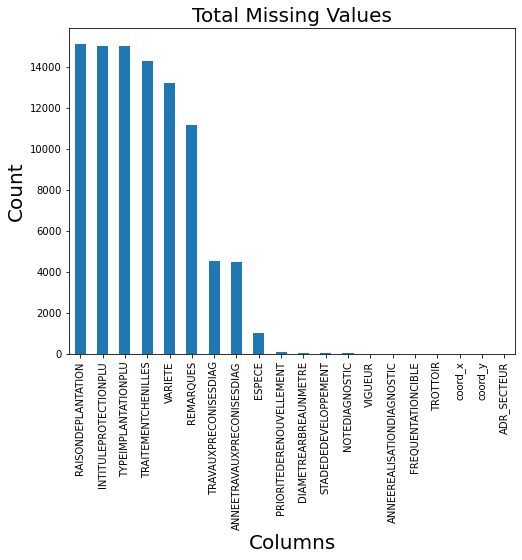

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

In [ ]:
pourcentage_missing

RAISONDEPLANTATION            98.504065
TYPEIMPLANTATIONPLU           97.652033
INTITULEPROTECTIONPLU         97.652033
TRAITEMENTCHENILLES           92.923577
VARIETE                       85.931707
REMARQUES                     72.689431
TRAVAUXPRECONISESDIAG         29.430894
ANNEETRAVAUXPRECONISESDIAG    29.339837
ESPECE                         6.621138
PRIORITEDERENOUVELLEMENT       0.826016
DIAMETREARBREAUNMETRE          0.435772
STADEDEDEVELOPPEMENT           0.331707
NOTEDIAGNOSTIC                 0.260163
STADEDEVELOPPEMENTDIAG         0.084553
VIGUEUR                        0.071545
ANNEEREALISATIONDIAGNOSTIC     0.052033
FREQUENTATIONCIBLE             0.006504
TROTTOIR                       0.000000
coord_y                        0.000000
coord_x                        0.000000
ADR_SECTEUR                    0.000000
SOUS_CATEGORIE_DESC            0.000000
ANNEEDEPLANTATION              0.000000
GENRE_BOTA                     0.000000
CODE_PARENT_DESC               0.000000


In [ ]:
# define the threshold
columns_to_drop =pourcentage_missing[pourcentage_missing> 90].index

In [ ]:
df=df.drop(columns_to_drop,axis=1)

In [ ]:
pourcentage_missing=(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

In [ ]:
pourcentage_missing

VARIETE                       85.931707
REMARQUES                     72.689431
TRAVAUXPRECONISESDIAG         29.430894
ANNEETRAVAUXPRECONISESDIAG    29.339837
ESPECE                         6.621138
PRIORITEDERENOUVELLEMENT       0.826016
DIAMETREARBREAUNMETRE          0.435772
STADEDEDEVELOPPEMENT           0.331707
NOTEDIAGNOSTIC                 0.260163
VIGUEUR                        0.071545
ANNEEREALISATIONDIAGNOSTIC     0.052033
FREQUENTATIONCIBLE             0.006504
coord_y                        0.000000
coord_x                        0.000000
TROTTOIR                       0.000000
ADR_SECTEUR                    0.000000
SOUS_CATEGORIE_DESC            0.000000
ANNEEDEPLANTATION              0.000000
GENRE_BOTA                     0.000000
CODE_PARENT_DESC               0.000000
CODE_PARENT                    0.000000
DEFAUT                         0.000000
dtype: float64

In [ ]:
df['VARIETE'].unique()

array([nan, 'Italica', 'Pyramidalis', 'Austriaca', 'Glauca', 'Wierii',
       'Fruitless', 'Vallis clausa', 'Pendula', 'Raywood', 'Flame',
       'Inermis', 'Schwedleri nigra', 'Plena', 'Chanticleer',
       'Atropurpurea', 'Negenia', 'Hupehensis', 'Fastigiata',
       'Purpurascens', 'Shidare yoshino', 'Allumi', 'Baumanii',
       'Variegata', 'Rubrum', 'Green vase', 'Capital', 'Hornett',
       'Greenspire', 'Reinette Vignat', 'Legrelliae',
       'Précoce de Trévoux', 'Briotti', 'Kausteriana glauca', 'Kansan',
       'Columnaris', 'Calva', 'Purpurea', 'Fargesii', 'Crimson king',
       'Yang', 'Celsan', 'David', 'Nationale', 'Eléagnifolia',
       'Docteur Guyot', 'Stricta', 'Engelm', 'Belle de Pontoise',
       'Westhoff glorie', 'Doyenne du comice', 'Perpetu', 'Mancana',
       'Aureum', 'Everesta', 'Mirabelle de Nancy', 'Fast gold', 'Burlat',
       'Myrobolan', 'Reine des reinettes', 'Ombrella', 'Mariesii',
       'Jonagold', 'Charlottae', 'Autumn blaze', 'Claude Blanchet',
    

In [ ]:
df['TRAVAUXPRECONISESDIAG'].unique()

array(['Controle', nan, 'Taille mise en sécurité',
       'Controle résistographe', 'Taille de bois mort', 'Taille rideau',
       'Taille déclaircie', 'Taille formation et mise au gabarit',
       'Abattage', 'Controle tuteur attache ou protection',
       'Taille cohabitation', 'Taille de prolongement',
       'Aménagement pieds darbres', 'Arrosage', 'Emondage', 'Haubannage'],
      dtype=object)

In [ ]:
df['ESPECE'].unique()

array(['cordata', 'acerifolia', 'grandiflora', 'japonica', 'americana',
       'abies', 'excelsior', 'nigra', nan, 'tomentosa', 'verrucosa',
       'styraciflua', 'pseudoplatanus', 'retusus', 'arizonica',
       'tulipifera', 'carica', 'siliquastrum', 'betulus', 'australis',
       'campestris', 'altissima', 'floribunda', 'platanoides',
       'sempervirens', 'pseudoacacia', 'baccata', 'saccharinum',
       'bombycis', 'platanor', 'ornus', 'robur', 'domestica',
       'cappadocicum', 'lawsoniana', 'serrulata', 'hippocastanum',
       'sylvestris', 'utilis', 'campestre', 'indica', 'platyphyllos',
       'exelsa', 'triacanthos', 'occidentalis', 'babylonica',
       'chrysocoma', 'colurna', 'spaitii', 'alba', 'negundo', 'cerris',
       'kagayamae', 'regia', 'carnea', 'japonicum', 'atlantica',
       'orientalis', 'suber', 'bignonoides', 'tartarica', 'castaneifolia',
       'angustifolia', 'avium', 'leylandii', 'calleryana', 'nordmaniana',
       'bumalda', 'ceracifera', 'canadensis', 'co

In [ ]:
variables_a_imputer = ['ESPECE', 'TRAVAUXPRECONISESDIAG','VARIETE','REMARQUES']


In [ ]:
for variable in variables_a_imputer:
    df[variable] = df[variable].fillna('Aucun')

In [ ]:
pourcentage_missing=(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
pourcentage_missing

ANNEETRAVAUXPRECONISESDIAG    29.339837
PRIORITEDERENOUVELLEMENT       0.826016
DIAMETREARBREAUNMETRE          0.435772
STADEDEDEVELOPPEMENT           0.331707
NOTEDIAGNOSTIC                 0.260163
VIGUEUR                        0.071545
ANNEEREALISATIONDIAGNOSTIC     0.052033
FREQUENTATIONCIBLE             0.006504
coord_y                        0.000000
coord_x                        0.000000
VARIETE                        0.000000
TROTTOIR                       0.000000
TRAVAUXPRECONISESDIAG          0.000000
ADR_SECTEUR                    0.000000
SOUS_CATEGORIE_DESC            0.000000
REMARQUES                      0.000000
ANNEEDEPLANTATION              0.000000
GENRE_BOTA                     0.000000
ESPECE                         0.000000
CODE_PARENT_DESC               0.000000
CODE_PARENT                    0.000000
DEFAUT                         0.000000
dtype: float64

In [ ]:
L = ['VIGUEUR', 'NOTEDIAGNOSTIC', 'STADEDEDEVELOPPEMENT', 'DIAMETREARBREAUNMETRE', 'PRIORITEDERENOUVELLEMENT', 'ANNEEREALISATIONDIAGNOSTIC', 'FREQUENTATIONCIBLE','ANNEETRAVAUXPRECONISESDIAG']
for i in L:
    print(f'{i}:{df[i].unique()}')

VIGUEUR:['vigoureux' 'vieillissement dépérissement' 'vigueur intermédiaire' nan]
NOTEDIAGNOSTIC:['Arbre davenir normal' 'Arbre à abattre dans les 5 ans'
 'Arbre à abattre dans les 10 ans' 'Arbre davenir incertain'
 'Arbre à abattre immédiatement' nan]
STADEDEDEVELOPPEMENT:['Arbre jeune' 'Arbre adulte' 'Arbre vieillissant' nan]
DIAMETREARBREAUNMETRE:['10 à 20 cm' '30 à 40 cm' '40 à 50 cm' '20 à 30 cm' '0 à 10 cm'
 '110 à 120 cm' '100 à 110 cm' '70 à 80 cm' '50 à 60 cm' '60 à 70 cm'
 '80 à 90 cm' '90 à 100 cm' nan '130 à 140 cm' '120 à 130 cm'
 '160 à 170 cm' '140 à 150 cm' '150 à 160 cm' '180 à 190 cm'
 '170 à 180 cm']
PRIORITEDERENOUVELLEMENT:['plus de 20 ans' 'de 1 à 5 ans' 'de 11 à 20 ans' 'de 6 à 10 ans' nan]
ANNEEREALISATIONDIAGNOSTIC:['2014' '2013' nan '2015' '2011' '2012']
FREQUENTATIONCIBLE:['passages fréquents ou arrêts' 'passages fréquents et arrêts fréquents'
 'quelques passages' nan]
ANNEETRAVAUXPRECONISESDIAG:['2019' nan '2014' '2018' '2020' '2017' '2016' '2015' '2012' '201

In [ ]:
def remplir_nans(df):
    for i in range(len(L)):
        mode_value = df[L[i]].mode()[0]
        df[L[i]].fillna(mode_value, inplace=True)
    return df

In [ ]:
df = remplir_nans(df)

In [ ]:
pourcentage_missing=(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
pourcentage_missing

ADR_SECTEUR                   0.0
ANNEEDEPLANTATION             0.0
coord_y                       0.0
coord_x                       0.0
VIGUEUR                       0.0
VARIETE                       0.0
TROTTOIR                      0.0
TRAVAUXPRECONISESDIAG         0.0
STADEDEDEVELOPPEMENT          0.0
SOUS_CATEGORIE_DESC           0.0
REMARQUES                     0.0
PRIORITEDERENOUVELLEMENT      0.0
NOTEDIAGNOSTIC                0.0
GENRE_BOTA                    0.0
FREQUENTATIONCIBLE            0.0
ESPECE                        0.0
DIAMETREARBREAUNMETRE         0.0
CODE_PARENT_DESC              0.0
CODE_PARENT                   0.0
ANNEETRAVAUXPRECONISESDIAG    0.0
ANNEEREALISATIONDIAGNOSTIC    0.0
DEFAUT                        0.0
dtype: float64

In [ ]:
df['ADR_SECTEUR'] = df['ADR_SECTEUR'].astype('object')

In [ ]:
df['ANNEEDEPLANTATION']=df['ANNEEDEPLANTATION'].astype('object')

In [ ]:
df=df.drop('CODE_PARENT',axis=1)

In [ ]:
for i in df:
    print(f'{i}:{df[i].unique()}')

ADR_SECTEUR:[5 3 2 1 6 4]
ANNEEDEPLANTATION:[2014 2004 2009 2005 2006 2015 2008 2011 2012 2010 2013 2007]
ANNEEREALISATIONDIAGNOSTIC:['2014' '2013' '2015' '2011' '2012']
ANNEETRAVAUXPRECONISESDIAG:['2019' '2014' '2018' '2020' '2017' '2016' '2015' '2012' '2013' '2025'
 '2024']
CODE_PARENT_DESC:['R D Fontanelle ang Essen JO' 'Crs Libération Beauvert Alliés'
 'Pl R Frappat ang Eaux Claires' ... 'Parc Cellatex zone boisée'
 'Chem de Halage désinfection ' 'R Manteyer ang D Fontanelle']
DIAMETREARBREAUNMETRE:['10 à 20 cm' '30 à 40 cm' '40 à 50 cm' '20 à 30 cm' '0 à 10 cm'
 '110 à 120 cm' '100 à 110 cm' '70 à 80 cm' '50 à 60 cm' '60 à 70 cm'
 '80 à 90 cm' '90 à 100 cm' '130 à 140 cm' '120 à 130 cm' '160 à 170 cm'
 '140 à 150 cm' '150 à 160 cm' '180 à 190 cm' '170 à 180 cm']
ESPECE:['cordata' 'acerifolia' 'grandiflora' 'japonica' 'americana' 'abies'
 'excelsior' 'nigra' 'Aucun' 'tomentosa' 'verrucosa' 'styraciflua'
 'pseudoplatanus' 'retusus' 'arizonica' 'tulipifera' 'carica'
 'siliquastrum' '

#### Handling Categoriel Data

In [ ]:
categorical_columns = df.columns[df.dtypes == 'object']
categorical_columns = categorical_columns.drop(['REMARQUES'])

categorical_columns

Index(['ADR_SECTEUR', 'ANNEEDEPLANTATION', 'ANNEEREALISATIONDIAGNOSTIC',
       'ANNEETRAVAUXPRECONISESDIAG', 'CODE_PARENT_DESC',
       'DIAMETREARBREAUNMETRE', 'ESPECE', 'FREQUENTATIONCIBLE', 'GENRE_BOTA',
       'NOTEDIAGNOSTIC', 'PRIORITEDERENOUVELLEMENT', 'SOUS_CATEGORIE_DESC',
       'STADEDEDEVELOPPEMENT', 'TRAVAUXPRECONISESDIAG', 'TROTTOIR', 'VARIETE',
       'VIGUEUR'],
      dtype='object')

In [ ]:
le = LabelEncoder()
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

In [ ]:
df

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,CODE_PARENT_DESC,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,GENRE_BOTA,NOTEDIAGNOSTIC,...,REMARQUES,SOUS_CATEGORIE_DESC,STADEDEDEVELOPPEMENT,TRAVAUXPRECONISESDIAG,TROTTOIR,VARIETE,VIGUEUR,coord_x,coord_y,DEFAUT
0,4,10,3,7,766,1,53,1,5,1,...,Aucun,0,1,4,0,3,1,1.915371e+06,4.222837e+06,0
1,2,0,2,2,340,12,2,0,75,1,...,Aucun,0,0,3,0,3,1,1.913250e+06,4.222531e+06,0
2,2,0,4,2,609,1,89,1,59,1,...,Aucun,2,0,4,1,3,1,1.913087e+06,4.223524e+06,0
3,1,0,3,2,818,13,102,0,94,1,...,Enormément de grosses branches cassées,0,0,14,1,3,1,1.914187e+06,4.224275e+06,1
4,0,0,2,2,1129,11,7,0,41,1,...,Aucun,0,0,3,1,3,1,1.912975e+06,4.225210e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15370,2,0,2,2,444,0,0,0,73,1,...,Aucun,2,0,3,0,3,1,1.912985e+06,4.222215e+06,0
15371,3,0,3,2,835,13,2,0,75,1,...,Aucun,0,0,11,0,3,1,1.913534e+06,4.223000e+06,0
15372,0,0,2,2,2,1,0,0,41,1,...,Aucun,0,0,3,0,32,1,1.913037e+06,4.225100e+06,0
15373,3,0,3,2,44,1,198,0,55,1,...,Réseau aérien passant audessus de larbre,0,0,3,1,3,1,1.914695e+06,4.222890e+06,0


#### NLP

In [ ]:
#NLP sur colonne remarques
# faire categorisation des remarques
!python -m spacy download fr_core_news_sm

import spacy
nlp = spacy.load("fr_core_news_sm")

[+] Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [ ]:
def remove_urls(string):
    regex = re.compile(r"(http|https|ftp)://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+")
    return re.sub(regex, ' ', string)

In [ ]:
def remove_extra_whitespace(string):
    string = re.sub(r'\s+', ' ', string)
    return re.sub(r"\s{2,}", " ", string).strip()

In [ ]:
def remove_ponctuations(s):
    return s.translate(str.maketrans('', '', string.punctuation))

In [ ]:
list=[]
for i in range (len(df)):
    phrase=remove_urls(df.iloc[i]['REMARQUES'])
    list.append(phrase)

In [ ]:
List1=[]
from cleantext import clean
for i in range(len(list)):
    phrase=clean(list[i])
    List1.append(phrase)

In [ ]:
List2=[]
for i in range(len(List1)):
    phrase=remove_extra_whitespace(List1[i])
    List2.append(phrase)

In [ ]:
List3=[]
for i in range(len(List2)):
    phrase=remove_ponctuations(List2[i])
    List3.append(phrase)

In [ ]:
List3

['aucun',
 'aucun',
 'aucun',
 'enormé de gross branch cassé',
 'aucun',
 'aucun',
 'aucun',
 'aucun',
 'aucun',
 'aucun',
 'aucun',
 'taillé en rideau',
 'aucun',
 'aucun',
 'aucun',
 'aucun',
 'aucun',
 'inonotu hispidu dan le tronc',
 'aucun',
 'protect à mettr en place',
 'essenc ne correspond pa sur le terrain',
 'cépée tuteur',
 'surveil le dépérissement',
 'aucun',
 'aucun',
 'beaucoup',
 'cheminé en format vérifier la cicatris',
 'aucun',
 'aucun',
 'aucun',
 'dépérissant',
 'aucun',
 'cépée',
 'aucun',
 'aucun',
 'aucun',
 'var austriaca',
 'aucun',
 'var austriaca',
 'aucun',
 'aucun',
 'aucun',
 'le lierr gêne lobserv',
 'aucun',
 'aucun',
 'aucun',
 'aucun',
 'aucun',
 'aucun',
 'dominé concurr de voisin',
 'aucun',
 'aucun',
 'aucun',
 'aucun',
 'aucun',
 'aucun',
 'aucun',
 'var wieri',
 'tête de chat cavité cimenté au pie réduction tou le an',
 'aucun',
 'aucun',
 'aucun',
 'lierr lampadair tuteur bipod',
 'aucun',
 'essenc ne correspond pa sur le terrain',
 'aucun',
 'a

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
stop_words = set(stopwords.words('french'))
stemmer = SnowballStemmer('french')

preprocessed_texts = []
for text in List3:
    words = [stemmer.stem(word) for word in text.lower().split() if word.isalnum() and word not in stop_words]
    preprocessed_texts.append(' '.join(words))

In [ ]:
preprocessed_texts

['aucun',
 'aucun',
 'aucun',
 'enorm gross branch cass',
 'aucun',
 'aucun',
 'aucun',
 'aucun',
 'aucun',
 'aucun',
 'aucun',
 'taill rideau',
 'aucun',
 'aucun',
 'aucun',
 'aucun',
 'aucun',
 'inonotu hispidu dan tronc',
 'aucun',
 'protect mettr plac',
 'essenc correspond pa terrain',
 'cep tuteur',
 'surveil déper',
 'aucun',
 'aucun',
 'beaucoup',
 'chemin format vérifi cicatr',
 'aucun',
 'aucun',
 'aucun',
 'déper',
 'aucun',
 'cep',
 'aucun',
 'aucun',
 'aucun',
 'var austriac',
 'aucun',
 'var austriac',
 'aucun',
 'aucun',
 'aucun',
 'lierr gên lobserv',
 'aucun',
 'aucun',
 'aucun',
 'aucun',
 'aucun',
 'aucun',
 'domin concurr voisin',
 'aucun',
 'aucun',
 'aucun',
 'aucun',
 'aucun',
 'aucun',
 'aucun',
 'var wier',
 'têt chat cavit ciment pi réduct tou an',
 'aucun',
 'aucun',
 'aucun',
 'lierr lampadair tuteur bipod',
 'aucun',
 'essenc correspond pa terrain',
 'aucun',
 'aucun',
 'têt chat',
 'aucun',
 'aucun',
 'aucun',
 'aucun',
 'aucun',
 'charpentier affaibl bas r

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_texts)

In [ ]:
X

<15375x1250 sparse matrix of type '<class 'numpy.float64'>'
	with 25464 stored elements in Compressed Sparse Row format>

In [ ]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)

C:\Users\Nouhaila Chg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
df['classe_Remarques'] = clusters
print(df[['REMARQUES', 'classe_Remarques']])

                                      REMARQUES  classe_Remarques
0                                         Aucun                 0
1                                         Aucun                 0
2                                         Aucun                 0
3        Enormément de grosses branches cassées                 2
4                                         Aucun                 0
...                                         ...               ...
15370                                     Aucun                 0
15371                                     Aucun                 0
15372                                     Aucun                 0
15373  Réseau aérien passant audessus de larbre                 2
15374                                     Aucun                 0

[15375 rows x 2 columns]


In [ ]:
df=df.drop('REMARQUES',axis=1)

In [ ]:
pd.set_option('display.max_columns',None)

df['classe_Remarques'].unique()

array([0, 2, 1])

#### Normalisation des données

In [ ]:
columns_to_scale = ['coord_x', 'coord_y']

scaler = MinMaxScaler()
df_scaled_values = scaler.fit_transform(df[columns_to_scale])
scaled_df = pd.DataFrame(df_scaled_values, columns=[f'{col}_scaled' for col in columns_to_scale])
df = df.drop(columns=columns_to_scale)

df = pd.concat([df, scaled_df], axis=1)

In [ ]:
df.head(4)

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,CODE_PARENT_DESC,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,GENRE_BOTA,NOTEDIAGNOSTIC,PRIORITEDERENOUVELLEMENT,SOUS_CATEGORIE_DESC,STADEDEDEVELOPPEMENT,TRAVAUXPRECONISESDIAG,TROTTOIR,VARIETE,VIGUEUR,DEFAUT,classe_Remarques,coord_x_scaled,coord_y_scaled
0,4,10,3,7,766,1,53,1,5,1,3,0,1,4,0,3,1,0,1,0.797215,0.390588
1,2,0,2,2,340,12,2,0,75,1,3,0,0,3,0,3,1,0,1,0.309266,0.340224
2,2,0,4,2,609,1,89,1,59,1,3,2,0,4,1,3,1,0,1,0.271646,0.503946
3,1,0,3,2,818,13,102,0,94,1,3,0,0,14,1,3,1,1,0,0.524740,0.627665


In [ ]:
X=df.drop(columns='DEFAUT', axis=1)
y=df['DEFAUT']

In [ ]:
X
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=123)
print(f'x_train{X_train.shape}\n, x_test{X_test.shape}\n, y_train{y_train.shape}\n, y_test{y_test.shape}')

x_train(12300, 20)
, x_test(3075, 20)
, y_train(12300,)
, y_test(3075,)


In [ ]:
X = sm.add_constant(X)

# Effectuez une régression linéaire avec statsmodels
model = sm.OLS(y, X).fit()

# Obtenez les p-values pour chaque variable
p_values = model.pvalues[1:]

# Appliquez la correction de Bonferroni
alpha = 0.05
_, bonferroni_p_values, _, _ = multipletests(p_values, alpha=alpha, method='bonferroni')

# Sélectionnez les variables significatives après correction de Bonferroni
significant_variables = X.columns[1:][bonferroni_p_values < alpha]

print("Variables significatives après correction de Bonferroni:", significant_variables)

Variables significatives après correction de Bonferroni: Index(['ANNEEDEPLANTATION', 'ANNEEREALISATIONDIAGNOSTIC',
       'DIAMETREARBREAUNMETRE', 'GENRE_BOTA', 'NOTEDIAGNOSTIC',
       'PRIORITEDERENOUVELLEMENT', 'SOUS_CATEGORIE_DESC',
       'STADEDEDEVELOPPEMENT', 'TRAVAUXPRECONISESDIAG', 'classe_Remarques'],
      dtype='object')


#### Classification uni-label

In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier


In [ ]:
model = BaggingClassifier(estimator=KNeighborsClassifier(),
                         n_estimators=100)

model.fit(X_train, y_train)
model.score(X_test, y_test)


0.7808130081300813

In [ ]:
model = RandomForestClassifier(n_estimators=100)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8640650406504065

In [ ]:
from joblib import dump
dump(model,'fdec_model.joblib')

['fdec_model.joblib']

In [ ]:
modelR = BaggingClassifier(estimator=LogisticRegression(),
                         n_estimators=100)

modelR.fit(X_train, y_train)
modelR.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.7411382113821138

In [ ]:
modelogit = LogisticRegression(random_state=42)
modelogit.fit(X_train, y_train)

y_pred = modelogit.predict(X_test)

accuracyLogit = accuracy_score(y_test, y_pred)
conf_matrixLogit = confusion_matrix(y_test, y_pred)
class_reportLogit = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracyLogit}')
print(f'Confusion Matrix:\n{conf_matrixLogit}')
print(f'Classification Report:\n{class_reportLogit}')


Accuracy: 0.760650406504065
Confusion Matrix:
[[1870  214]
 [ 522  469]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84      2084
           1       0.69      0.47      0.56       991

    accuracy                           0.76      3075
   macro avg       0.73      0.69      0.70      3075
weighted avg       0.75      0.76      0.75      3075



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.7378861788617886


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
logreg2=LogisticRegression(C=100,penalty="l2")
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_test,y_test))

score 0.7447154471544716


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
modelR = BaggingClassifier(estimator=LogisticRegression(C=100,penalty="l2"),
                         n_estimators=150)

modelR.fit(X_train, y_train)
modelR.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.7434146341463415

In [ ]:
# Initialisation et entraînement du modèle SVM
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.6777235772357724
Confusion Matrix:
[[2084    0]
 [ 991    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      1.00      0.81      2084
           1       0.00      0.00      0.00       991

    accuracy                           0.68      3075
   macro avg       0.34      0.50      0.40      3075
weighted avg       0.46      0.68      0.55      3075



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Création du modèle Naive Bayes gaussien
model = GaussianNB()

# Entraînement du modèle
model.fit(X_train, y_train)

# Évaluation du modèle
accuracy = model.score(X_test, y_test)
print("Précision du modèle Naive Bayes : {:.2f}%".format(accuracy * 100))

Précision du modèle Naive Bayes : 80.75%


In [ ]:
# Création du modèle Naive Bayes gaussien
model = GaussianNB()

# Définir la grille des hyperparamètres à rechercher
param_grid = {
   'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
}

# Création de l'objet GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Exécution de la recherche sur la grille
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres
print("Meilleurs paramètres :", grid_search.best_params_)

# Obtention du modèle avec les meilleurs paramètres
best_model = grid_search.best_estimator_

# Évaluation du modèle avec les meilleurs paramètres
accuracy = best_model.score(X_test, y_test)
print("Précision du modèle avec les meilleurs paramètres : {:.2f}%".format(accuracy * 100))

Meilleurs paramètres : {'var_smoothing': 1e-06}
Précision du modèle avec les meilleurs paramètres : 80.78%


In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
model = AdaBoostClassifier(n_estimators=200)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8442276422764228

In [ ]:
# Définir la grille des hyperparamètres à rechercher
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],  # Ajustez ces valeurs selon vos besoins
    # Vous pouvez également ajuster d'autres paramètres spécifiques à AdaBoost ici
}

# Création de l'objet GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Exécution de la recherche sur la grille
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres
print("Meilleur nombre d'estimateurs :", grid_search.best_params_['n_estimators'])

# Obtention du modèle avec les meilleurs paramètres
best_model = grid_search.best_estimator_

# Évaluation du modèle avec les meilleurs paramètres
accuracy = best_model.score(X_test, y_test)
print("Précision du modèle avec les meilleurs paramètres : {:.2f}%".format(accuracy * 100))

Meilleur nombre d'estimateurs : 250
Précision du modèle avec les meilleurs paramètres : 84.39%


In [ ]:
model = GradientBoostingClassifier(n_estimators=400)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8627642276422764

In [ ]:
###########################""
# grids rando



model = RandomForestClassifier(n_estimators=100)

model.fit(X_train, y_train)
model.score(X_test, y_test)




0.8656910569105691

#### Grid Search

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],  # Ajustez ces valeurs selon vos besoins
    # Vous pouvez également ajuster d'autres paramètres spécifiques à AdaBoost ici
}

# Création de l'objet GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Exécution de la recherche sur la grille
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres
print("Meilleur nombre d'estimateurs :", grid_search.best_params_['n_estimators'])

# Obtention du modèle avec les meilleurs paramètres
best_model = grid_search.best_estimator_

# Évaluation du modèle avec les meilleurs paramètres
accuracy = best_model.score(X_test, y_test)
print("Précision du modèle avec les meilleurs paramètres : {:.2f}%".format(accuracy * 100))

Meilleur nombre d'estimateurs : 200
Précision du modèle avec les meilleurs paramètres : 86.47%


In [ ]:
df.head()

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,CODE_PARENT_DESC,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,GENRE_BOTA,NOTEDIAGNOSTIC,PRIORITEDERENOUVELLEMENT,SOUS_CATEGORIE_DESC,STADEDEDEVELOPPEMENT,TRAVAUXPRECONISESDIAG,TROTTOIR,VARIETE,VIGUEUR,DEFAUT,classe_Remarques,coord_x_scaled,coord_y_scaled
0,4,10,3,7,766,1,53,1,5,1,3,0,1,4,0,3,1,0,1,0.797215,0.390588
1,2,0,2,2,340,12,2,0,75,1,3,0,0,3,0,3,1,0,1,0.309266,0.340224
2,2,0,4,2,609,1,89,1,59,1,3,2,0,4,1,3,1,0,1,0.271646,0.503946
3,1,0,3,2,818,13,102,0,94,1,3,0,0,14,1,3,1,1,0,0.524740,0.627665
4,0,0,2,2,1129,11,7,0,41,1,3,0,0,3,1,3,1,0,1,0.245854,0.781820


#### Classification multi-label

In [ ]:
dfTarget=pd.read_csv("donnees-defi-egc.csv")
dfTarget = dfTarget.iloc[:, -4:]

In [ ]:
dfTarget

,Collet,Houppier,Racine,Tronc
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,1,1,0
4,0,0,0,0
...,...,...,...,...
15370,0,0,0,0
15371,0,0,0,0
15372,0,0,0,0
15373,0,0,0,0


In [ ]:
df_sansT=df.drop('DEFAUT', axis=1)
concatenated_df = pd.concat([df_sansT, dfTarget], axis=1)

# Affichage du DataFrame concaténé
concatenated_df.head()

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,CODE_PARENT_DESC,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,GENRE_BOTA,NOTEDIAGNOSTIC,PRIORITEDERENOUVELLEMENT,SOUS_CATEGORIE_DESC,STADEDEDEVELOPPEMENT,TRAVAUXPRECONISESDIAG,TROTTOIR,VARIETE,VIGUEUR,classe_Remarques,coord_x_scaled,coord_y_scaled,Collet,Houppier,Racine,Tronc
0,4,10,3,7,766,1,53,1,5,1,3,0,1,4,0,3,1,0,0.797215,0.390588,0,0,0,0
1,2,0,2,2,340,12,2,0,75,1,3,0,0,3,0,3,1,0,0.309266,0.340224,0,0,0,0
2,2,0,4,2,609,1,89,1,59,1,3,2,0,4,1,3,1,0,0.271646,0.503946,0,0,0,0
3,1,0,3,2,818,13,102,0,94,1,3,0,0,14,1,3,1,2,0.524740,0.627665,0,1,1,0
4,0,0,2,2,1129,11,7,0,41,1,3,0,0,3,1,3,1,0,0.245854,0.781820,0,0,0,0


In [ ]:

#RF

# Séparation des caractéristiques (X) et des étiquettes (y)
X = df_sansT
y = dfTarget

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création d'un dictionnaire pour stocker les modèles
classifiers = {}

# Entraînez un modèle pour chaque classe
for defect_class in ['Collet', 'Houppier', 'Racine', 'Tronc']:
    # Créez un modèle RandomForestClassifier pour la classe en cours
    model = RandomForestClassifier(random_state=42)

    # Entraînez le modèle
    model.fit(X_train, y_train[defect_class])

    # Stockez le modèle dans le dictionnaire
    classifiers[defect_class] = model

# Prédiction sur l'ensemble de test
predictions = {defect_class: model.predict(X_test) for defect_class, model in classifiers.items()}

# Évaluation de la performance pour chaque classe
for defect_class in classifiers.keys():
    accuracy = accuracy_score(y_test[defect_class], predictions[defect_class])
    report = classification_report(y_test[defect_class], predictions[defect_class])

    print(f"Accuracy for {defect_class}: {accuracy}")
    print(f"Classification Report for {defect_class}:\n{report}")

Accuracy for Collet: 0.944390243902439
Classification Report for Collet:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2872
           1       0.71      0.27      0.39       203

    accuracy                           0.94      3075
   macro avg       0.83      0.63      0.68      3075
weighted avg       0.93      0.94      0.93      3075

Accuracy for Houppier: 0.8874796747967479
Classification Report for Houppier:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2429
           1       0.76      0.67      0.72       646

    accuracy                           0.89      3075
   macro avg       0.84      0.81      0.82      3075
weighted avg       0.88      0.89      0.88      3075

Accuracy for Racine: 0.9534959349593496
Classification Report for Racine:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2924
           1

In [ ]:
from joblib import dump
dump(model,'fdec_model_multi.joblib')

['fdec_model_multi.joblib']

In [ ]:
from sklearn.ensemble import AdaBoostClassifier



classifiers = {}
# Entraînez un modèle pour chaque classe
for defect_class in ['Collet', 'Houppier', 'Racine', 'Tronc']:
    # Créez un modèle RandomForestClassifier pour la classe en cours
    model = AdaBoostClassifier(random_state=42)

    # Entraînez le modèle
    model.fit(X_train, y_train[defect_class])

    # Stockez le modèle dans le dictionnaire
    classifiers[defect_class] = model

# Prédiction sur l'ensemble de test
predictions = {defect_class: model.predict(X_test) for defect_class, model in classifiers.items()}

# Évaluation de la performance pour chaque classe
for defect_class in classifiers.keys():
    accuracy = accuracy_score(y_test[defect_class], predictions[defect_class])
    report = classification_report(y_test[defect_class], predictions[defect_class])

    print(f"Accuracy for {defect_class}: {accuracy}")
    print(f"Classification Report for {defect_class}:\n{report}")

Accuracy for Collet: 0.9352845528455285
Classification Report for Collet:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2872
           1       0.55      0.10      0.17       203

    accuracy                           0.94      3075
   macro avg       0.75      0.55      0.57      3075
weighted avg       0.91      0.94      0.91      3075

Accuracy for Houppier: 0.8621138211382113
Classification Report for Houppier:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      2429
           1       0.72      0.57      0.63       646

    accuracy                           0.86      3075
   macro avg       0.80      0.75      0.77      3075
weighted avg       0.85      0.86      0.86      3075

Accuracy for Racine: 0.9492682926829268
Classification Report for Racine:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2924
           

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

classifiers = {}

# Entraînez un modèle pour chaque classe
for defect_class in ['Collet', 'Houppier', 'Racine', 'Tronc']:
    # Créez un modèle BaggingClassifier avec un DecisionTreeClassifier pour la classe en cours
    base_model = DecisionTreeClassifier(random_state=42)
    model = BaggingClassifier(base_model, random_state=42)

    # Entraînez le modèle
    model.fit(X_train, y_train[defect_class])

    # Stockez le modèle dans le dictionnaire
    classifiers[defect_class] = model

# Prédiction sur l'ensemble de test
predictions = {defect_class: model.predict(X_test) for defect_class, model in classifiers.items()}

# Évaluation de la performance pour chaque classe
for defect_class in classifiers.keys():
    accuracy = accuracy_score(y_test[defect_class], predictions[defect_class])
    report = classification_report(y_test[defect_class], predictions[defect_class])

    print(f"Accuracy for {defect_class}: {accuracy}")
    print(f"Classification Report for {defect_class}:\n{report}")


Accuracy for Collet: 0.9395121951219512
Classification Report for Collet:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2872
           1       0.59      0.28      0.38       203

    accuracy                           0.94      3075
   macro avg       0.77      0.63      0.67      3075
weighted avg       0.93      0.94      0.93      3075

Accuracy for Houppier: 0.8783739837398374
Classification Report for Houppier:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2429
           1       0.75      0.63      0.69       646

    accuracy                           0.88      3075
   macro avg       0.83      0.79      0.81      3075
weighted avg       0.87      0.88      0.87      3075

Accuracy for Racine: 0.9502439024390243
Classification Report for Racine:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2924
           